In [1]:
# importando pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# importando los datasets de sklearn
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
#boston_df.head() # estructura de nuestro dataset.
df = boston_df

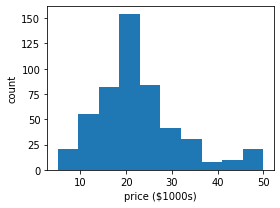

In [3]:
data = datasets.load_boston()
plt.figure(figsize=(4, 3))
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

In [4]:
HOW_SCALE = "minmax"  # standard|minmax  como re-escalar los atributos

In [5]:
X = df.drop("TARGET", axis=1).to_numpy()
y = df["TARGET"].to_numpy()

In [6]:
def realiza_escala(HOW_SCALE):
    if HOW_SCALE == "standard":
        scaler=StandardScaler()
        X = scaler.fit_transform(X)
        return X
    elif HOW_SCALE == "minmax":
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
        return X

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.20)



# Buscando parametros para los modelos

In [8]:
# Training classifiers
#reg1 = GradientBoostingRegressor()
#reg2 = RandomForestRegressor()
#reg3 = LinearRegression()


## Parametros para GradientBoostingRegressor

In [9]:
#create a dictionary of all values we want to test for n_neighbors
#params_gradient = {'n_estimators': np.arange(1, 100)}
#use gridsearch to test all values for n_neighbors
#knn_gs = GridSearchCV(reg1, params_gradient, cv=5,n_jobs=-1)
#fit model to training data
#knn_gs.fit(x_train, y_train)

In [10]:
#save best model
#knn_best = knn_gs.best_estimator_
#check best n_neigbors value
#print(knn_gs.best_params_)

## Parametros para RandomForestRegressor

In [11]:
#create a dictionary of all values we want to test for n_neighbors
#params_gradient = {'n_estimators': np.arange(1, 100)}
#use gridsearch to test all values for n_neighbors
#knn_gs = GridSearchCV(reg2, params_gradient, cv=5,n_jobs=-1)
#fit model to training data
#knn_gs.fit(x_train, y_train)

In [12]:
#save best model
#knn_best = knn_gs.best_estimator_
#check best n_neigbors value
#print(knn_gs.best_params_)

# Creando la votación

In [13]:
reg1 = GradientBoostingRegressor()
reg2 = RandomForestRegressor()
reg3 = LinearRegression()

In [14]:
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(x_train, y_train)

# Predicción con votación

## Mediciones


In [15]:
prediccion=ereg.predict(x_test)

accuracy = ereg.score(x_train, y_train)

print("Accuracy VotingRegressor: {:.3f}".format(accuracy))


#trainScore = math.sqrt(mean_squared_error(y_train,prediccion))
#print('Entrenamiento VotingRegressor: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(y_test,prediccion))
print('VotingRegressor: %.2f RMSE' % (testScore))

# calcula el r2
#trainScore = r2_score(y_train, prediccion)
#print('Entrenamiento VotingRegressor: %.2f R2' % (trainScore))

testScore = r2_score(y_test, prediccion)
print('VotingRegressor: %.2f R^2' % (testScore))




Accuracy VotingRegressor: 0.945
VotingRegressor: 2.86 RMSE
VotingRegressor: 0.91 R^2


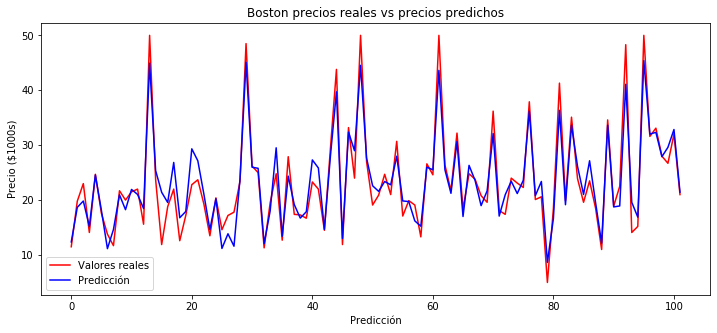

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.plot(y_test, color = 'red', label ="Valores reales")
ax.plot(prediccion, color='blue', label = 'Predicción')
plt.title("Boston precios reales vs precios predichos")
plt.xlabel('Predicción')
plt.ylabel('Precio ($1000s)')
plt.legend(loc='best')
plt.show()